In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq

In [24]:
theta_180_1 = pd.read_csv('180_theta_1.csv')
theta_180_2 = pd.read_csv('180_theta_2.csv')
half_theta_1 = pd.read_csv('Half_theta.csv')
half_theta_2 = pd.read_csv('Half_theta_2.csv')
df = half_theta_2
df.head()

,xAccl,yAccl,zAccl,newPosition,time,pcTime
0,1007,-66,-48,0,346576,440.875053
1,1007,-72,-59,0,371498,465.658903
2,1008,-75,-45,0,396502,490.717888
3,1006,-65,-53,0,421509,515.764952
4,1011,-67,-53,0,446513,540.741920


In [25]:
df['delta_time'] = df['pcTime'].diff()
df.head(10)

,xAccl,yAccl,zAccl,newPosition,time,pcTime,delta_time
0,1007,-66,-48,0,346576,440.875053,NaN
1,1007,-72,-59,0,371498,465.658903,24.783850
2,1008,-75,-45,0,396502,490.717888,25.058985
3,1006,-65,-53,0,421509,515.764952,25.047064
4,1011,-67,-53,0,446513,540.741920,24.976969
5,1008,-74,-44,0,471520,565.711021,24.969101
6,1007,-75,-54,0,496524,590.770006,25.058985
7,1009,-70,-54,0,521532,615.640163,24.870157
8,1011,-68,-55,0,546535,640.830040,25.189877
9,1008,-77,-49,0,571542,665.774107,24.944067


In [ ]:
# remove first 2 rows
# df = df.iloc[2:]
# df = df.reset_index(drop=True)
# df.head(10)

,xAccl,yAccl,zAccl,newPosition,time,pcTime,delta_time
0,-1033,104,219,0,595269,689.889908,1.929998
1,-1033,104,219,0,620267,713.876009,23.986101
2,-1033,104,219,0,645269,738.950968,25.074959
3,-1033,104,219,0,670272,763.975143,25.024176
4,-1033,104,219,0,695278,788.877964,24.902821
5,-1033,104,219,0,720286,813.932896,25.054932
6,-1033,104,219,0,745293,838.914871,24.981976
7,-1033,104,219,0,770300,863.991976,25.077105
8,-1033,104,219,0,795308,889.050007,25.058031
9,-1033,104,219,0,820308,913.999081,24.949074


In [26]:
acc_x = df['xAccl'].values
acc_y = df['yAccl'].values
acc_z = df['zAccl'].values
time = df['time'].values

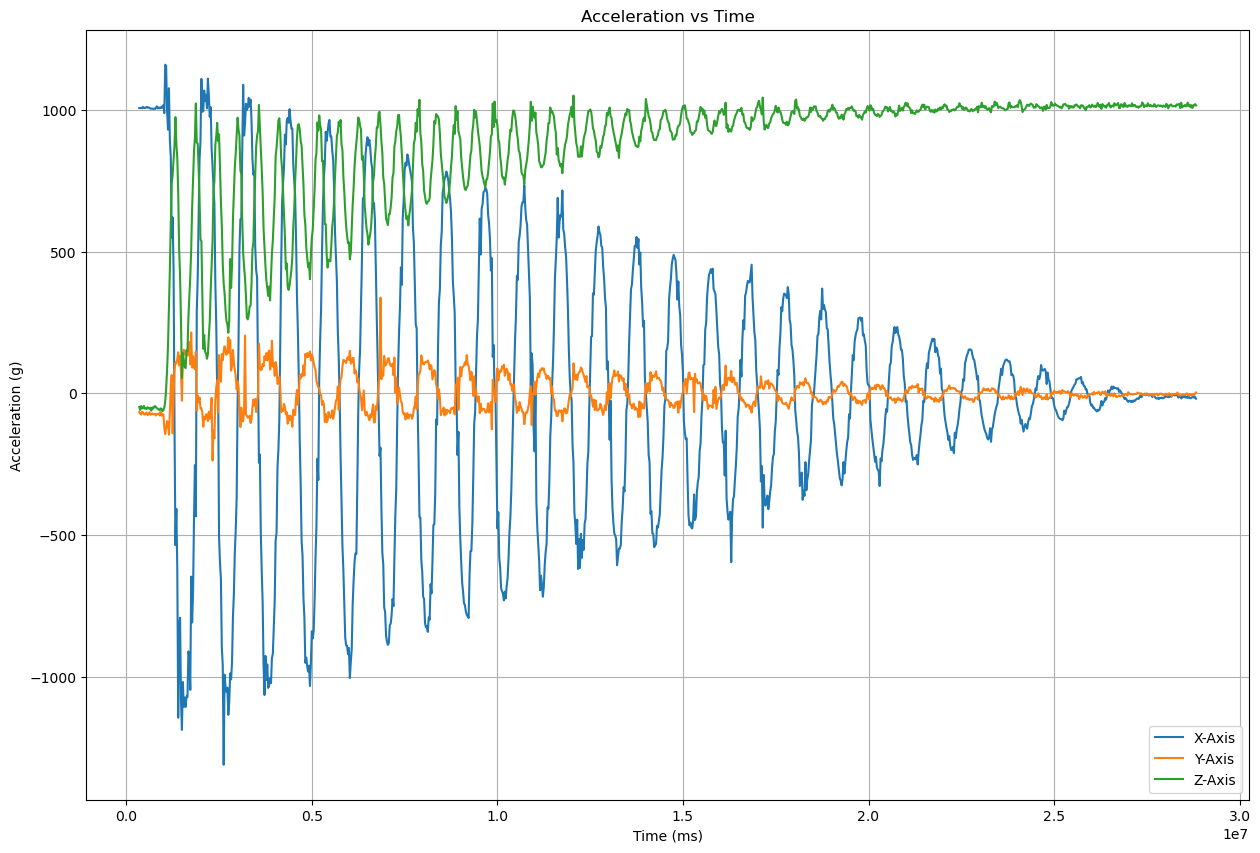

In [27]:
# Plot the data
plt.figure(figsize=(15, 10))
plt.plot(time, acc_x, label='X-Axis')
plt.plot(time, acc_y, label='Y-Axis')
plt.plot(time, acc_z, label='Z-Axis')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (g)')
plt.title('Acceleration vs Time')
plt.legend(['X-Axis', 'Y-Axis', 'Z-Axis'])
plt.grid(True)
plt.show()

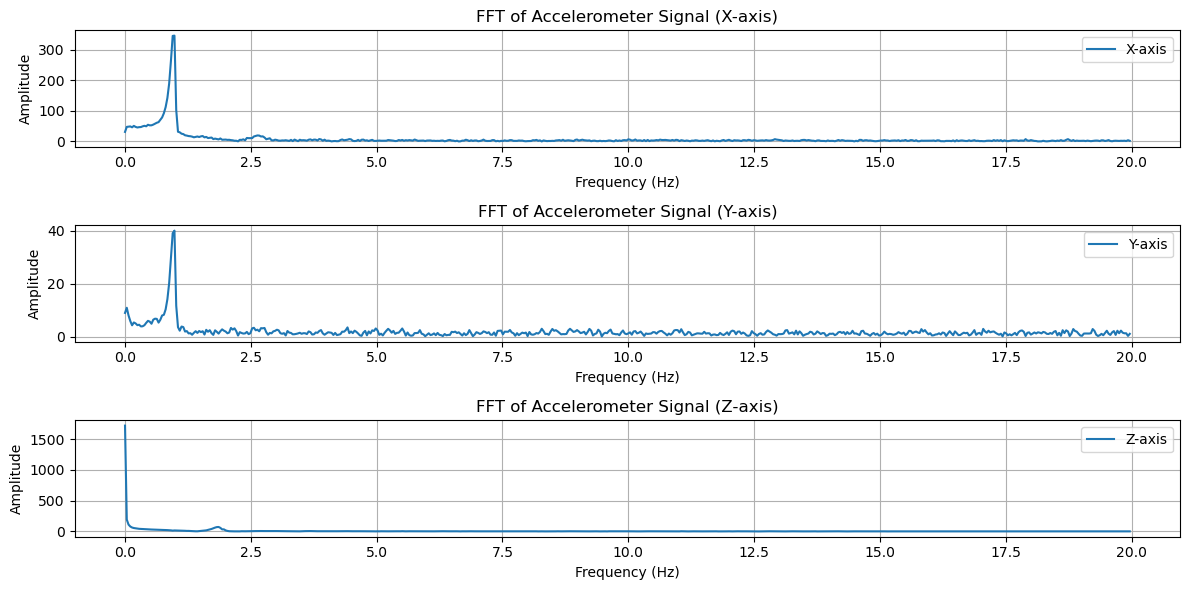

In [28]:
fs = 40 # Sampling frequency (Hz) ---> delta_time = 25ms ==> 1/0.025 = 40Hz

# Number of sample points
N = len(acc_x)
# Sample spacing
T = 1.0 / fs
# Compute the FFT
yf_x = fft(acc_x)
yf_y = fft(acc_y)
yf_z = fft(acc_z)
xf = fftfreq(N, T)[:N // 2]

# Plot the FFT
fig, ax = plt.subplots(3, 1, figsize=(12, 6))

# Plot FFT for X-axis
ax[0].plot(xf, 2.0 / N * np.abs(yf_x[:N // 2]), label='X-axis')
ax[0].set_title('FFT of Accelerometer Signal (X-axis)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()
ax[0].legend()

# Plot FFT for Y-axis
ax[1].plot(xf, 2.0 / N * np.abs(yf_y[:N // 2]), label='Y-axis')
ax[1].set_title('FFT of Accelerometer Signal (Y-axis)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].grid()
ax[1].legend()

# Plot FFT for Z-axis
ax[2].plot(xf, 2.0 / N * np.abs(yf_z[:N // 2]), label='Z-axis')
ax[2].set_title('FFT of Accelerometer Signal (Z-axis)')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Amplitude')
ax[2].grid()
ax[2].legend()

plt.tight_layout()
plt.show()

In [29]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

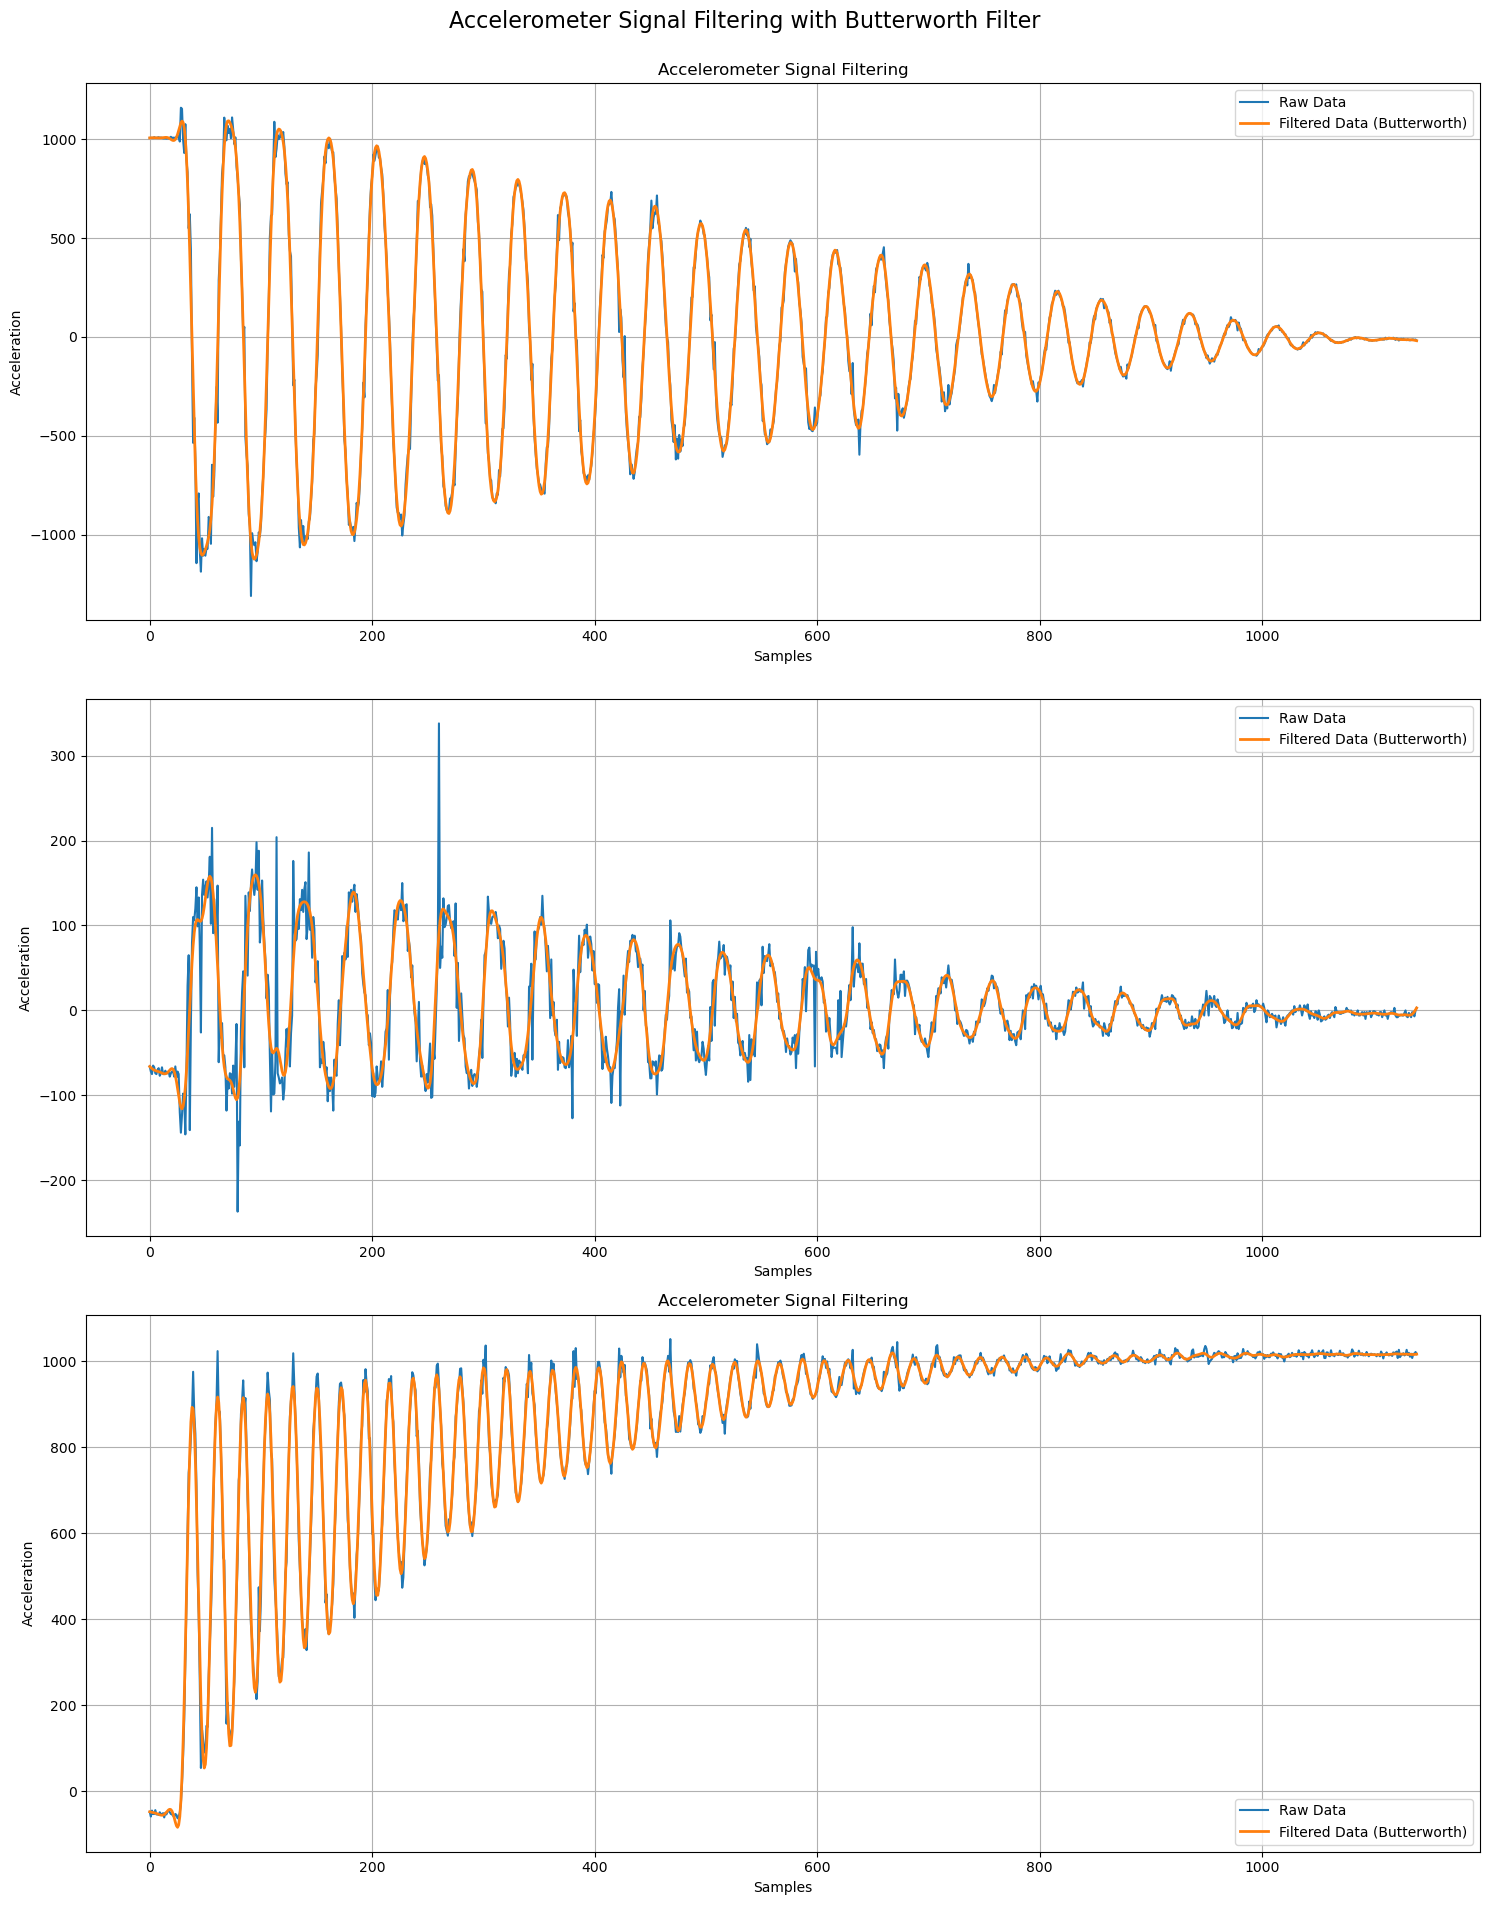

In [30]:
# Filter requirements:
fs = 40  # 40 Hz sampling rate
cutoff = 3  # Filter out everything above 5 Hz

# Apply filter
filtered_acc_x = butter_lowpass_filter(acc_x, cutoff, fs)
filtered_acc_y = butter_lowpass_filter(acc_y, cutoff, fs)
filtered_acc_z = butter_lowpass_filter(acc_z, cutoff, fs)

# Plot the result
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

ax[0].plot(acc_x, label='Raw Data')
ax[0].plot(filtered_acc_x, label='Filtered Data (Butterworth)', linewidth=2)
ax[0].legend()
ax[0].set_title('Accelerometer Signal Filtering')
ax[0].set_xlabel('Samples')
ax[0].set_ylabel('Acceleration')
ax[0].grid(True)

ax[1].plot(acc_y, label='Raw Data')
ax[1].plot(filtered_acc_y, label='Filtered Data (Butterworth)', linewidth=2)
ax[1].legend()
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Acceleration')
ax[1].grid(True)

ax[2].plot(acc_z, label='Raw Data')
ax[2].plot(filtered_acc_z, label='Filtered Data (Butterworth)', linewidth=2)
ax[2].legend()
ax[2].set_xlabel('Samples')
ax[2].set_ylabel('Acceleration')
ax[2].grid(True)
ax[2].set_title('Accelerometer Signal Filtering')

plt.suptitle('Accelerometer Signal Filtering with Butterworth Filter', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])  # Adjust layout to make room for the title
plt.show()

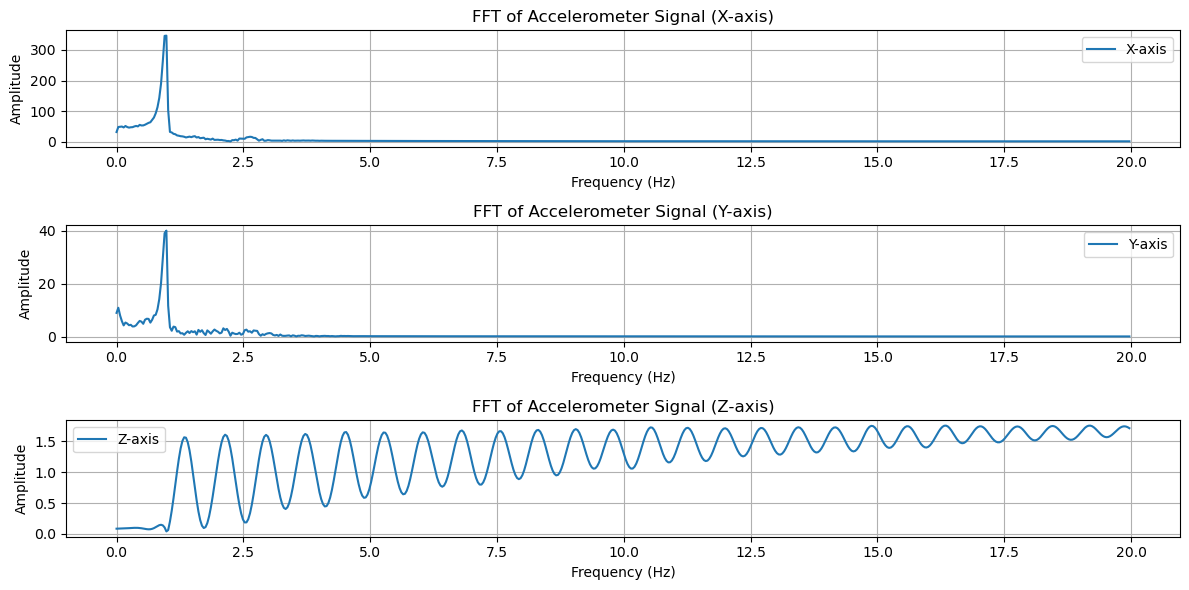

In [31]:
# Compute the FFT for filtered data
yf_x_filtered = fft(filtered_acc_x)
yf_y_filtered = fft(filtered_acc_y)
yf_z_filtered = fft(filtered_acc_z)

# Compute the FFT
xf = fftfreq(N, T)[:N // 2]

# Plot the FFT
fig, ax = plt.subplots(3, 1, figsize=(12, 6))

# Plot FFT for X-axis
ax[0].plot(xf, 2.0 / N * np.abs(yf_x_filtered[:N // 2]), label='X-axis')
ax[0].set_title('FFT of Accelerometer Signal (X-axis)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()
ax[0].legend()

# Plot FFT for Y-axis
ax[1].plot(xf, 2.0 / N * np.abs(yf_y_filtered[:N // 2]), label='Y-axis')
ax[1].set_title('FFT of Accelerometer Signal (Y-axis)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].grid()
ax[1].legend()

# Plot FFT for Z-axis
ax[2].plot(xf, 2.0 / N * np.abs(filtered_acc_z[:N // 2]), label='Z-axis')
ax[2].set_title('FFT of Accelerometer Signal (Z-axis)')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Amplitude')
ax[2].grid()
ax[2].legend()

plt.tight_layout()
plt.show()